In [17]:
import tensorflow as tf
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

ImportError: No module named 'object_detection'

In [5]:
PATH_TO_CKPT = './frozen_inference_graph.pb'

In [7]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [8]:
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

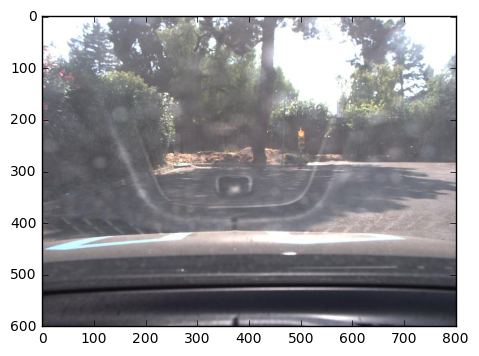

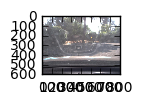

In [11]:
image = Image.open('./loop_with_traffic_light_0674.jpg')
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()

In [14]:
image_np_expanded = np.expand_dims(image, axis=0)

In [16]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

In [ ]:
vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)